In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_user = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1", parse_dates=['creation_time', 'last_session_creation_time'])

In [3]:
df_user.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1378448055,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1358274517,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1398602716,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1338638159,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1390726632,0,1,0,NaN


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_user.isna().sum() / len(df_user)

object_id                     0.00000
creation_time                 0.00000
name                          0.00000
email                         0.00000
creation_source               0.00000
last_session_creation_time    0.26475
opted_in_to_mailing_list      0.00000
enabled_for_marketing_drip    0.00000
org_id                        0.00000
invited_by_user_id            0.46525
dtype: float64

In [6]:
df_user.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


In [7]:
df_user['opted_in_to_mailing_list'].value_counts(normalize=True)

0    0.7505
1    0.2495
Name: opted_in_to_mailing_list, dtype: float64

In [8]:
df_user['enabled_for_marketing_drip'].value_counts(normalize=True)

0    0.850667
1    0.149333
Name: enabled_for_marketing_drip, dtype: float64

In [9]:
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [10]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
df_engagement.shape

(207917, 3)

In [12]:

# lets examine the user data to see who is actually using the application
print('There are {} users who have ever used the application.'\
          .format(len(list(df_engagement['user_id'].unique()))))
print('There are {} signed up for the application.'\
          .format(len(list(df_user['object_id'].unique()))))

print('There is a discrepancy of {} users.'\
          .format(int(len(list(df_user['object_id'].unique()))) 
                  - int(len(list(df_engagement['user_id'].unique())))))

There are 8823 users who have ever used the application.
There are 12000 signed up for the application.
There is a discrepancy of 3177 users.


In [13]:

# how many people never signed in?
print('There are ', len(df_user[df_user['last_session_creation_time'].isnull()]), 'inactive users.')

There are  3177 inactive users.


As outlined, in this case an adopted user is any ID that had logged in on at least 3 serarate occasions in a 7 day period.

In [14]:

# Check for missing data in each of the supplied data sets
print('user_engagement')
print(df_engagement.isnull().sum())
print("\n")
print('user_engagement')
print(df_user.isnull().sum())

user_engagement
time_stamp    0
user_id       0
visited       0
dtype: int64


user_engagement
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64


In [15]:

# bring in some datetime
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

In [16]:
# time to add in the adopted user feature so that we can categorize the data
import datetime
seven_days = datetime.timedelta(7)
adopted_dict = {}

for user_id in sorted(list(df_engagement['user_id'].unique())):
    
    adopted_user = False
    temp = df_engagement[df_engagement['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        this_time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = True
    
    adopted_dict[user_id] = adopted_user

C:\Users\Rishbha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [17]:
from collections import Counter
# what percentage of the users are sticking around?
count_df = pd.DataFrame.from_dict(Counter(list(adopted_dict.values())), orient='index').reset_index()

print('We have analyzed logs for', len(adopted_dict), 'unique users.')
count_df.iloc[1,1]
print(round((count_df.iloc[1,1]/(count_df.iloc[1,1]+count_df.iloc[0,1])*100),2) ,'of users are adopted-users.')

We have analyzed logs for 8823 unique users.
18.77 of users are adopted-users.


In [18]:
# Create adopted target variable and display dataset again
df_user['adopted'] = False
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False


In [19]:

# Replace adopted target class with correct flags
for row in (df_user[np.logical_not(df_user['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_dict[df_user.get_value(row[0], 'object_id')]
    df_user.set_value(row[0], 'adopted', adopted_value)
    
print('{:.2f}% of all users who have signed up for the application are considered \'adopted users\'.'\
          .format(len(df_user[df_user['adopted'] == True])/len(df_user)*100))

C:\Users\Rishbha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rishbha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


13.80% of all users who have signed up for the application are considered 'adopted users'.


In [20]:

# Check on the higher risk/more defined features
for feature in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']:
    print('{} feature:'.format(feature))
    print(df_user[feature].value_counts(), end='\n\n')

creation_source feature:
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

opted_in_to_mailing_list feature:
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

enabled_for_marketing_drip feature:
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64



In [23]:
df_user['last_session_creation_time'] = df_user['last_session_creation_time'].fillna(df_user['last_session_creation_time'].median())

# pd.to_datetime(df['mydates']).apply(lambda x: x.date())
# df_user['last_session_creation_time'] = df_user['last_session_creation_time'].astype('int').apply(lambda x: pd.datetime.fromtimestamp(x).date())
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])
# day of the week account created
df_user['day_created'] = df_user['creation_time'].apply(lambda x: x.dayofweek)
# hour of the day account created
df_user['hour_created'] = df_user['creation_time'].apply(lambda x: x.hour)
# drop the original column
df_user.drop('creation_time', axis=1, inplace=True)

In [24]:
df_user.head()

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day_created,hour_created
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False,1,3
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,True,4,3
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,False,1,23
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False,1,8
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False,3,10


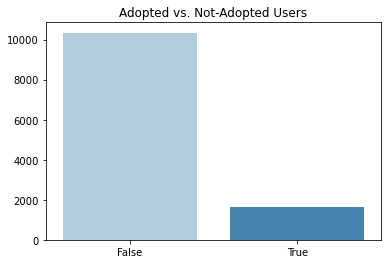

In [26]:
# Take another look at the distribution of the target class
sns.barplot(x = list(df_user['adopted'].value_counts().index), y = df_user['adopted'].value_counts(), palette='Blues')
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');


As there is a heavy imbalance in the classes here I will split the data into training and testing data and then oversample the training the data to balance out the classes w/o distorting the testing data.

In [28]:
df_user.drop(['name', 'email', 'invited_by_user_id', 'object_id'], axis=1, inplace=True)

df_user.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,day_created,hour_created
0,GUEST_INVITE,1398138810,1,0,11,False,1,3
1,ORG_INVITE,1396237504,0,0,1,True,4,3
2,ORG_INVITE,1363734892,0,0,94,False,1,23
3,GUEST_INVITE,1369210168,0,0,1,False,1,8
4,GUEST_INVITE,1358849660,0,0,193,False,3,10


In [29]:
# One-hot-encode creation_source
df_encoded = pd.get_dummies(df_user, columns = ['creation_source'])

In [30]:
X = df_encoded.drop('adopted', axis=1)
y = df_encoded['adopted']

In [32]:

# Split into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                           random_state=42, stratify=y)

In [33]:
#SMOTE oversampling to balance out the classes

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = ADASYN().fit_sample(X_train, y_train)
# X_resampled, y_resampled = X_train, y_train
#ADASYN().fit_sample(X, y)

print(sorted(Counter(y_resampled).items()))

[(False, 7241), (True, 7218)]


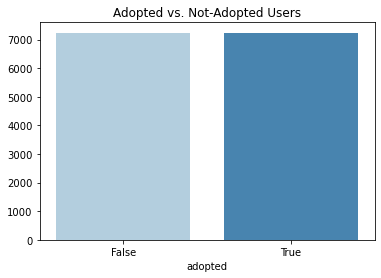

In [34]:
# Take a look at the distribution of the enhanced target class
sns.countplot(y_resampled, palette='Blues')
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');


# Predictive Models and Feature Importance
I will begin by examining the OOB performance of several different relevant model in order to glean the best one to start with and then fine tune.

In [36]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [39]:
from tqdm import tqdm
names = []
scores = []
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

  Name     Score
0  KNN  0.912778
1  SVC  0.861944
2   LR  0.861944
3   DT  0.875278
4  GNB  0.861944
5   RF  0.919444
6   GB  0.923333


In [41]:

names = []
scores = []
for name, model in tqdm(models):
    
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

100%|██████████| 7/7 [01:26<00:00, 12.29s/it]

  Name     Score
0  KNN  0.910500
1  SVC  0.862000
2   LR  0.862000
3   DT  0.871083
4  GNB  0.862000
5   RF  0.920167
6   GB  0.918917


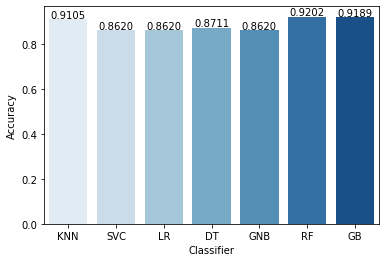

In [42]:
# Visualize model model scores
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val, palette='Blues')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [43]:
clf = GradientBoostingClassifier(verbose=True)
clf.fit(X_train, y_train)
print('Train Score:', round(clf.score(X_train,y_train),3))
print('Test Score:', round(clf.score(X_test,y_test),3))

      Iter       Train Loss   Remaining Time 
         1           0.7113            0.86s
         2           0.6571            1.18s
         3           0.6182            1.10s
         4           0.5883            1.08s
         5           0.5645            1.05s
         6           0.5450            1.01s
         7           0.5291            0.97s
         8           0.5156            0.92s
         9           0.5044            0.90s
        10           0.4939            0.87s
        20           0.4454            0.99s
        30           0.4291            1.04s
        40           0.4187            0.94s
        50           0.4102            0.79s
        60           0.4029            0.64s
        70           0.3966            0.54s
        80           0.3917            0.36s
        90           0.3866            0.18s
       100           0.3821            0.00s
Train Score: 0.929
Test Score: 0.923


In [44]:
# TP / FP 
confusion_matrix(y_test, clf.predict(X_test))

array([[3008,   95],
       [ 181,  316]], dtype=int64)

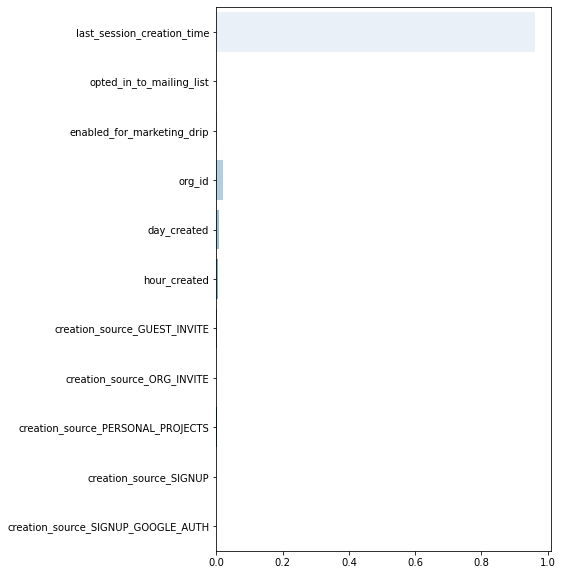

In [45]:
features = pd.Series(clf.feature_importances_, index=X.columns)

plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=clf.feature_importances_, palette='Blues')

In [46]:

# Find feature importances
feature_importance = pd.DataFrame(clf.feature_importances_).T
feature_importance.columns = list(X_train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_importance']
feature_importance.sort_values('feature_importance', ascending=False)

,feature_importance
last_session_creation_time,0.961958
org_id,0.018899
day_created,0.008253
hour_created,0.004566
enabled_for_marketing_drip,0.002671
creation_source_GUEST_INVITE,0.001504
creation_source_PERSONAL_PROJECTS,0.000771
opted_in_to_mailing_list,0.000655
creation_source_SIGNUP,0.000334
creation_source_ORG_INVITE,0.000264


As can be seen above the most important feature is the most recent log-in time.

now lets try some hyperparameter tunning.

In [47]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=2007), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)

C:\Users\Rishbha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=2007,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='roc_auc')

In [49]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.40978208, 0.53672533, 0.78667812, 1.07099299, 1.2440433 ,
         1.28909779, 1.58413148]),
  'std_fit_time': array([0.05649648, 0.02075715, 0.04616402, 0.04835343, 0.0441469 ,
         0.0417609 , 0.1009072 ]),
  'mean_score_time': array([0.04203014, 0.02836661, 0.02474608, 0.03148513, 0.02777758,
         0.03422275, 0.04050674]),
  'std_score_time': array([0.0414538 , 0.01043929, 0.00329651, 0.00362575, 0.00278631,
         0.00722841, 0.01936847]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.8848233 , 0.90029053, 0.90188459, 0.90325538, 0.90668163,
         0.90758359, 0.90760145]),
  'spl

In [51]:
clf_tuned = GradientBoostingClassifier(learning_rate=0.05, 
                                       n_estimators=70, 
                                       max_features='auto', 
                                       subsample=0.85,
                                       max_depth= 6,
                                       min_samples_split= 800,
                                       random_state=2007,
                                       verbose=True)

In [52]:

clf_tuned.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7572           0.0420            1.06s
         2           0.7219           0.0328            0.88s
         3           0.6887           0.0319            0.98s
         4           0.6677           0.0232            0.91s
         5           0.6398           0.0216            1.59s
         6           0.6242           0.0183            1.96s
         7           0.6060           0.0173            1.73s
         8           0.5904           0.0148            1.66s
         9           0.5781           0.0129            1.53s
        10           0.5598           0.0115            1.42s
        20           0.4932           0.0047            1.08s
        30           0.4540           0.0025            0.92s
        40           0.4259           0.0007            0.71s
        50           0.4186          -0.0000            0.50s
        60           0.4083          -0.0003            0.26s
       

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features='auto',
                           min_samples_split=800, n_estimators=70,
                           random_state=2007, subsample=0.85, verbose=True)

In [53]:
print('Train Score:', round(clf_tuned.score(X_train,y_train),3))
print('Test Score:', round(clf_tuned.score(X_test,y_test),3))

Train Score: 0.925
Test Score: 0.921



# Conclusion:
With approximatly 81% of the userbase no considered non adoptive users, we have an obvious area for improvment in user engagment. This is also exemplified by the fact that we have several thousand users who, after creating an account, never engaged with the system (loged in). From the feature importances the last log in time was the most highly correlated with a positive prediction, which is not surprising. However, I am not certain how useful the is as a real world predictor as those who have logged in more recently are more likely to be in the engaged crowed, and thus this dilutes its usefulness as a predictor of whether or not a novel user will become an adopted user. My recommendations at this point would be to identify the top sources of engaged users (sign-up origin) and increase marketing efforts there. Further, we can conduct more detailed surveys amoungst adopted users to attempt to identify new commonfeatures to add to the model that may increase its validity.